## KMean with 4 clusters. Converge to the  13th  iterations.
The values of the centers are at the end

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
#from sklearn.preprocessing import RobustScaler
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.cluster import KElbowVisualizer


### Import data, divide by train and test sets, plot data to train

In [89]:
file_to_read="data_full_banknote.txt"
df_full_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_full_banknote= df_full_banknote.drop_duplicates()
# put the headers
df_full_banknote.columns=["V1", "V2", "V3", "V4", "class"]
df_full_banknote.drop(["V3", "V4"],axis=1, inplace=True)


In [105]:
df_train_Kmeans, df_test_kmeans = train_test_split(df_full_banknote, test_size = 0.20)
print("data to train kmeans: ", len(df_train_Kmeans))
print("data to test kmean: ", len(df_test_kmeans))

data to train kmeans:  1077
data to test kmean:  270


In [ ]:
# Initial data 
df_train_Kmeans.drop(["class"],axis=1, inplace=True)
X_bank=np.array(df_train_Kmeans)

In [111]:

#to define start points to my clusters , instead kmeans++ or random in KMeans from sklearn. To make my own tester.
# Using random data

X_bank=np.array(df_train_Kmeans)
k=4

centers_C1= X_bank[10]
centers_C2= X_bank[350]
centers_C3= X_bank[150]
centers_C4= X_bank[590]


dist_1=[np.linalg.norm(xy- centers_C1) for xy in X_bank]
dist_2=[np.linalg.norm(xy- centers_C2) for xy in X_bank] 
dist_3=[np.linalg.norm(xy- centers_C3) for xy in X_bank]
dist_4=[np.linalg.norm(xy- centers_C4) for xy in X_bank]

n_cluster=[np.linalg.norm(xy- xy) for xy in X_bank]

data_cluster=np.column_stack((X_bank[:,0], X_bank[:,1], dist_1, dist_2, dist_3, dist_4 , n_cluster))


for indice,elemento  in enumerate(data_cluster):
    
    data_cluster[indice,6]=np.argmin(data_cluster[indice,2:6])

df_bank=pd.DataFrame(data_cluster)
df_bank.columns=["V1", "V2", "dist_1" , "dist_2", "dist_3", "dist_4" , "n_cluster" ]
df_bank.drop(["dist_1" , "dist_2", "dist_3", "dist_4"],axis=1, inplace=True)






<function matplotlib.pyplot.show(close=None, block=None)>

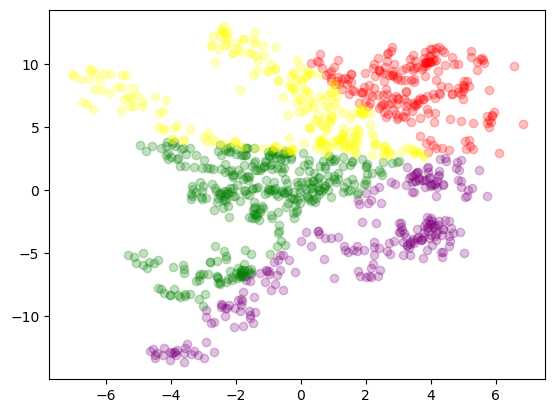

In [112]:
#k=1
cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="red", alpha=0.25)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.25)
#plt.scatter(X_bank[:,0], X_bank[:,1], c="purple", alpha=0.25)

plt.show

(-1.3199332155778893, -7.279100502512561) (0.6998630739307535, 0.8581629975560082) (2.6077064685314686, 7.8891776223776215) (-3.5597886138613863, 8.350951485148515)


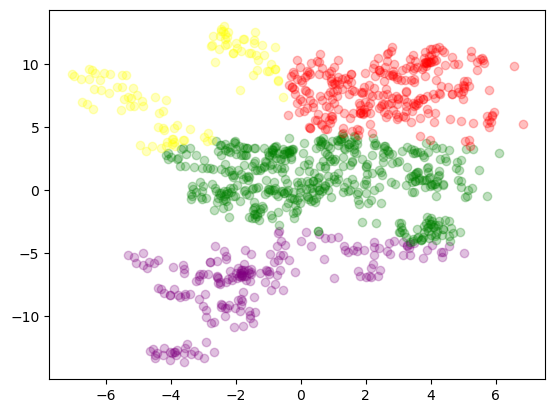

In [126]:

center_V1_C1=cluster1["V1"].sum() / len(cluster1)
center_V2_C1=cluster1["V2"].sum() / len(cluster1)
center_V1_C2=cluster2["V1"].sum() / len(cluster2)
center_V2_C2=cluster2["V2"].sum() / len(cluster2)
center_V1_C3=cluster3["V1"].sum() / len(cluster3)
center_V2_C3=cluster3["V2"].sum() / len(cluster3)
center_V1_C4=cluster4["V1"].sum() / len(cluster4)
center_V2_C4=cluster4["V2"].sum() / len(cluster4)


# Initial data 
X_bank=np.array(df_train_Kmeans)

centers_C1= (center_V1_C1, center_V2_C1)
centers_C2= (center_V1_C2, center_V2_C2)
centers_C3= (center_V1_C3, center_V2_C3)
centers_C4= (center_V1_C4, center_V2_C4)

print(centers_C1, centers_C2, centers_C3, centers_C4 )


dist_1=[np.linalg.norm(xy- centers_C1) for xy in X_bank]
dist_2=[np.linalg.norm(xy- centers_C2) for xy in X_bank] 
dist_3=[np.linalg.norm(xy- centers_C3) for xy in X_bank]
dist_4=[np.linalg.norm(xy- centers_C4) for xy in X_bank]

n_cluster=[np.linalg.norm(xy- xy) for xy in X_bank]

data_cluster=np.column_stack((X_bank[:,0], X_bank[:,1], dist_1, dist_2, dist_3, dist_4 , n_cluster))


for indice,elemento  in enumerate(data_cluster):
    data_cluster[indice,6]=np.argmin(data_cluster[indice,2:6])

df_bank=pd.DataFrame(data_cluster)
df_bank.columns=["V1", "V2", "dist_1" , "dist_2", "dist_3", "dist_4" , "n_cluster" ]
df_bank.drop(["dist_1" , "dist_2", "dist_3", "dist_4"],axis=1, inplace=True)

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="red", alpha=0.25)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.25)


1_vez
(1.6864830129707111, -4.464841866108786)
(-1.333534688555858, -0.6808919950953678)
(3.422068443396226, 8.108132075471698) 
(-0.6637423166023166, 6.450303088803088)

2 veces
(0.30162893977272726, -5.922906621212121) 
(-0.40884557090301005, 0.3847169892976589)
(3.384579791666667, 7.662792083333333)
(-1.1038427189781022, 6.139105109489051)
3 veces

(-0.27300294780876494, -6.441684462151395)
 (0.28400521906077353, 0.8753174911602211) 
 (3.2662827572016457, 7.776080658436213) 
 (-1.6324045248868777, 6.710308597285068)

 4 veces
(-0.6752248256521739, -6.779572173913042)
(0.5589544914746543, 1.0189090594470045)
(3.182694647302904, 7.923202904564315)
(-2.2504795930232557, 7.44285523255814)

5 veces
(-0.8805700449999999, -6.938078181818182) 
(0.6323850310195228, 1.0262532143167027) 
(3.0644198373983738, 7.94594918699187) 
(-2.5627994000000003, 7.807592666666666)

6 veces
(-0.9967408406542057, -7.035869626168223) 
(0.6542563583682008, 1.031573079079498) 
(2.9318220948616602, 7.951954940711462) 
(-2.8329661363636367, 8.131117424242424)

7 veces
(-1.0645532696682465, -7.082751658767772)
(0.6469226334024897, 1.0001857506224066) 
(2.8113681849056604, 7.9146894339622635) 
(-3.0670342773109245, 8.298708403361346)

8 veces
(-1.1326775956730768, -7.129901442307692)
(0.6588578380658436, 0.9763659090534981)
(2.7485190774907746, 7.913665313653137) 
(-3.234153392857143, 8.361341964285714)

9 veces
(-1.1841477665048543, -7.160480582524272)
(0.6748434141975308, 0.9398980078189302)
(2.6877729241877257, 7.887405776173285) 
(-3.345565740740741, 8.389121296296295)

10 veces
(-1.2727582582089552, -7.247305970149252)
(0.6909234067346939, 0.8854974118367347) 
(2.6416171631205674, 7.89105)
(-3.4656984615384614, 8.366409615384615)

11 veces
(-1.2964555495, -7.2631805)
 (0.6944023863265306, 0.8682716975510205) 
 (2.6077064685314686, 7.8891776223776215) 
 (-3.5597886138613863, 8.350951485148515)

 12 veces
(-1.3199332155778893, -7.279100502512561)
(0.6998630739307535, 0.8581629975560082) 
(2.6077064685314686, 7.8891776223776215) 
(-3.5597886138613863, 8.350951485148515)

13 veces
(-1.3199332155778893, -7.279100502512561)
(0.6998630739307535, 0.8581629975560082)
(2.6077064685314686, 7.8891776223776215) 
(-3.5597886138613863, 8.350951485148515)

14 veces
(-1.3199332155778893, -7.279100502512561) 
(0.6998630739307535, 0.8581629975560082)
(2.6077064685314686, 7.8891776223776215) 
(-3.5597886138613863, 8.350951485148515)
 